### Import python files from another directory
In order to reuse code written in .py files you need to import them.
If they are from a distant folder, rather than copy-paste it into the current folder, you can write:

In [1]:
import sys
sys.path.append("../../ex02/template") # This goes up twice in the directories tree (hence in labs)
                                       # then goes down to ex02/template where your files from lab 2 are.

you can now import your desired files, for example, we can import grid_search.py with:

In [3]:
import grid_search        # You then need to call your functions using grid_search.function_name()
import grid_search as gs  # You then need to call your functions using gs.function_name()
from grid_search import * # You can call any functions of the file with function_name()

# Let's try to call generate_w from grid_search.py:
w0, w1 = generate_w(5)
print(w0, w1)

[-100.  -25.   50.  125.  200.] [-150.  -75.    0.   75.  150.]


As you can see we are now able to call functions from the grid_search.py file.

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [54]:
def compute_mse(y, tx, w):
    err = y - tx.dot(w)
    return (1/2)*np.mean(err**2)

In [65]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w_star = np.linalg.solve(np.dot(tx.T, tx), np.dot(tx.T, y))
    return compute_mse(y, tx, w_star), w_star

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [66]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, w0_n in enumerate(w0):
        for j, w1_n in enumerate(w1):
            losses[i, j] = compute_mse(y, tx, [w0_n, w1_n])
    return losses

In [67]:
def generate_w(num_intervals):
    """Generate a grid of values for w0 and w1."""
    w0 = np.linspace(-100, 200, num_intervals)
    w1 = np.linspace(-150, 150, num_intervals)
    return w0, w1

def get_best_parameters(w0, w1, losses):
    """Get the best w from the result of grid search."""
    min_row, min_col = np.unravel_index(np.argmin(losses), losses.shape)
    return losses[min_row, min_col], w0[min_row], w1[min_col]


In [68]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    grid_w0, grid_w1 = generate_w(num_intervals=100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}".format(
      l=loss_star, w0=w0_star, w1=w1_star))
    
    loss_ls, w_ls = least_squares(y, tx)
    
    print("Least Squares: loss*={l}, w0*={w0}, w1*={w1}".format(
      l=loss_ls, w0=w_ls[0], w1=w_ls[1]))
    

Test it here

In [69]:
test_your_least_squares()

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626
Least Squares: loss*=15.3858878688294, w0*=73.29392200210505, w1*=13.479712434989228


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [51]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [109]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    tx = np.zeros((len(x), degree+1))
    for i in range(degree + 1):
        tx[:, i] = x**i
    return tx

In [106]:
type(build_poly(x, 3))

numpy.ndarray

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [113]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        loss, weights = least_squares(y, tx)
        rmse = np.sqrt(2*loss)
        

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248672


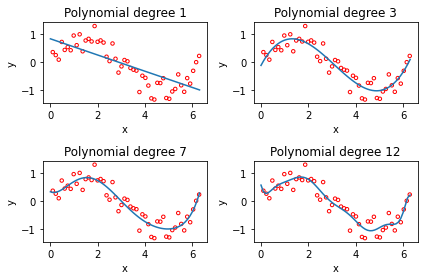

In [114]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [128]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    shuffle_indices = np.random.permutation(np.arange(len(y)))
    shuffled_y = y[shuffle_indices]
    shuffled_x = x[shuffle_indices]
    
    ratio_idx = int(ratio*len(y))
    train_y = shuffled_y[:ratio_idx]
    train_x = shuffled_x[:ratio_idx]
    test_y = shuffled_y[ratio_idx+1:]
    test_x = shuffled_x[ratio_idx+1:]
    return train_x, train_y, test_x, test_y

Then, test your `split_data` function below.

In [129]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x, train_y, test_x, test_y = split_data(x, y, ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_tx = build_poly(train_x, degree)
    test_tx = build_poly(test_x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    train_loss, w_star = least_squares(train_y, train_tx)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*train_loss)
    rmse_te = np.sqrt(2*compute_mse(test_y, test_tx, w_star))
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [130]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.694
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.196
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.121
proportion=0.9, degree=12, Training RMSE=0.248, Testing RMSE=0.172
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.564
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.312
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.343
proportion=0.5, degree=12, Training RMSE=0.213, Testing RMSE=0.357
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.754
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.680
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.339
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.938


# 3 Ridge Regression
Please fill in the function below.

In [131]:
def compute_ridge(y, tx, w, lambda_ = 0):
    err = y - tx.dot(w)
    return (1/2)*np.mean(err**2) + lambda_*(np.linalg.norm(w)**2)

In [138]:
def ridge_regression(y, tx, lambda_ = 0):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    A = np.dot(tx.T, tx)
    w_star = np.linalg.solve(A + np.identity(A.shape[0])*lambda_, np.dot(tx.T, y))
    return compute_ridge(y, tx, w_star, lambda_), w_star

In [141]:
height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)


loss_ls, w_ls = least_squares(y, tx)
    
print("Least Squares: loss*={l}, w0*={w0}, w1*={w1}".format(
  l=loss_ls, w0=w_ls[0], w1=w_ls[1]))

loss_r, w_r = ridge_regression(y, tx)
    
print("Ridge Regression: loss*={l}, w0*={w0}, w1*={w1}".format(
  l=loss_r, w0=w_r[0], w1=w_r[1]))

Least Squares: loss*=15.3858878688294, w0*=73.29392200210505, w1*=13.479712434989228
Ridge Regression: loss*=15.3858878688294, w0*=73.29392200210505, w1*=13.479712434989228


In [154]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x, train_y, test_x, test_y = split_data(x, y, ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_tx = build_poly(train_x, degree)
    test_tx = build_poly(test_x, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        tr_loss_r, tr_w_r = ridge_regression(train_y, train_tx, lambda_)
        te_loss_r = compute_ridge(test_y, test_tx, tr_w_r, lambda_)
        rmse_tr.append(np.sqrt(2*tr_loss_r))    
        rmse_te.append(np.sqrt(2*te_loss_r))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    


proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.470, Testing RMSE=5.502
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.484, Testing RMSE=5.515
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.513, Testing RMSE=5.545
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.580, Testing RMSE=5.611
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.729, Testing RMSE=5.760
proportion=0.5, degree=7, lambda=0.001, Training RMSE=6.055, Testing RMSE=6.084
proportion=0.5, degree=7, lambda=0.001, Training RMSE=6.739, Testing RMSE=6.765
proportion=0.5, degree=7, lambda=0.003, Training RMSE=8.082, Testing RMSE=8.103
proportion=0.5, degree=7, lambda=0.007, Training RMSE=10.517, Testing RMSE=10.533
proportion=0.5, degree=7, lambda=0.016, Training RMSE=14.618, Testing RMSE=14.630
proportion=0.5, degree=7, lambda=0.037, Training RMSE=21.172, Testing RMSE=21.180
proportion=0.5, degree=7, lambda=0.085, Training RMSE=31.338, Testing RMSE=31.343
proportion=0.5, degree=7, lambda

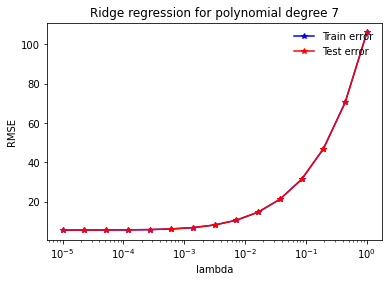

In [155]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)